In [2]:
try:           #importing rSNAPsim
    import rSNAPsim
except:
    import os
    os.chdir('..')
    import rSNAPsim
    
rss = rSNAPsim.rSNAPsim() #we have now created an instance of the rsnapsim named rss

### Getting started

Lets load in a file and explore what is stored once this gene file is analyzed

In [7]:
try:
    rss.open_seq_file('gene_files/HUMINSR.gb')
    
except: 
    try:
        import Bio        #Try to import biopython
        rss.get_gb_file('M10051')
    except:
        print('You have to install Biopython to use get_gb_file, to poll genbank')



C:\Users\willi\Documents\GitHub\rSNAPsim


#### What does the rss now contain?

The rss should now contain a sequence from the file and a name of the gene/file as well as the various dictionaries the rsnapsim uses to function. 

In [9]:
rss.__dict__.keys()

dict_keys(['gene_sequence_str', 'tag_dict', 'tag_colors', 'tag_full', 'aa_keys', 'codon_types', 'aa_table', 'aa_table_r', 'strGeneCopy', 'strGeneCopy_fast', 'strGeneCopy_slow', 'fast_codons_value', 'slow_codons_value', 'sensitivity_fast_slow', 'sequence_name', 'sequence_str', 'gb_obj', 'gb_rec'])

In [3]:
rss.sequence_str  #the sequence

'GGGGGGCTGCGCGGCCGGGTCGGTGCGCACACGAGAAGGACGCGCGGCCCCCAGCGCTCTTGGGGGCCGCCTCGGAGCATGACCCCCGCGGGCCAGCGCCGCGCGCCTGATCCGAGGAGACCCCGCGCTCCCGCAGCCATGGGCACCGGGGGCCGGCGGGGGGCGGCGGCCGCGCCGCTGCTGGTGGCGGTGGCCGCGCTGCTACTGGGCGCCGCGGGCCACCTGTACCCCGGAGAGGTGTGTCCCGGCATGGATATCCGGAACAACCTCACTAGGTTGCATGAGCTGGAGAATTGCTCTGTCATCGAAGGACACTTGCAGATACTCTTGATGTTCAAAACGAGGCCCGAAGATTTCCGAGACCTCAGTTTCCCCAAACTCATCATGATCACTGATTACTTGCTGCTCTTCCGGGTCTATGGGCTCGAGAGCCTGAAGGACCTGTTCCCCAACCTCACGGTCATCCGGGGATCACGACTGTTCTTTAACTACGCGCTGGTCATCTTCGAGATGGTTCACCTCAAGGAACTCGGCCTCTACAACCTGATGAACATCACCCGGGGTTCTGTCCGCATCGAGAAGAACAATGAGCTCTGTTACTTGGCCACTATCGACTGGTCCCGTATCCTGGATTCCGTGGAGGATAATCACATCGTGTTGAACAAAGATGACAACGAGGAGTGTGGAGACATCTGTCCGGGTACCGCGAAGGGCAAGACCAACTGCCCCGCCACCGTCATCAACGGGCAGTTTGTCGAACGATGTTGGACTCATAGTCACTGCCAGAAAGTTTGCCCGACCATCTGTAAGTCACACGGCTGCACCGCCGAAGGCCTCTGTTGCCACAGCGAGTGCCTGGGCAACTGTTCTCAGCCCGACGACCCCACCAAGTGCGTGGCCTGCCGCAACTTCTACCTGGACGGCAGGTGTGTGGAGACCTGCCCGCCCCCGTACTACCACTTCCAGGACTGGCGCTGTGTGAACTTCAGCTTCTGCCAG

In [12]:
rss.sequence_name

'HUMINSR'

### Generate proteins 

In [13]:
# now to look for open reading frames

rss.get_orfs(rss.sequence_str,min_codons=80) #default is a protein must be > 80 codons
rss.orfs

{'1': [(78, 4284)], '2': [(667, 979)], '3': []}


so frame 1 and frame 2 have a valid protein from sequence 78-4284 and 667-979
#### Lets take a look at that sequence and convert it to amino acids

In [6]:
protein1 = rss.sequence_str[78:4284]
rss.nt2aa(protein1)   #nucleotide to amino acid function

'MTPAGQRRAPDPRRPRAPAAMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFL

rsnapsim also has a method to get these proteins and store them into a dictionary proteins and list pois (Proteins of Interest)

In [16]:
rss.get_temporal_proteins()  #proteins sorted by frame 
print(rss.proteins)
print(' ')
print(rss.pois)   #proteins of interest in a list
print(' ')
print(rss.pois_seq) # and their sequences

{'1': ['MTPAGQRRAPDPRRPRAPAAMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVI

#### Now we can analyze a protein

This function takes a protein and builds a POI object with it. Analyzing a protein entails searching for fluorescent tags within the sequence, and if none are found it is autotagged with a 10x FLAG tag onto the beginning. The analysis also includes codon optimality and sensitivity.

Without a tag the simulation will have no intensity and not build a probe vector.

In [17]:
rss.analyze_poi(rss.pois[0],rss.pois_seq[0]) #analyze the first protein, analyze function takes the aa_seq then nt_seq
rss.POI

In [18]:
print(rss.POI.tag_epitopes)
print(' ')
print(rss.POI.aa_seq)

{'T_Flag': [2, 11, 20, 196, 206, 218, 228, 300, 309, 318]}
 
MDYKDDDDKGDYKDDDDKGDYKDDDDKGGNSLIKENMRMKVVMEGSVNGHQFKCTGEGEGNPYMGTQTMRIKVIEGGPLPFAFDILATSFGGGSRTFIKYPKGIPDFFKQSFPEGFTWERVTRYEDGGVVTVMQDTSLEDGCLVYHVQVRGVNFPSNGPVMQKKTKGWEPNTEMMYPADGGLRGYTHMALKVDGGDYKDDDDKQQDYKDDDDKGQQGDYKDDDDKQQDYKDDDDKGGGHLSCSFVTTYRSKKTVGNIKMPGIHAVDHRLERLEESDNEMFVVQREHAVAKFAGLGGGGGDYKDDDDKGDYKDDDDKGDYKDDDDKGGGGSGGGGSLQMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDE

Note that the HUMNINSR was automatically tagged with a 10x FLAG tag since no fluorescent tag was detected

In [21]:
rss.POI.__dict__.keys() #everything stored within the POI object

dict_keys(['aa_seq', 'nt_seq', 'gene_length', 'tag_length', 'total_length', 'name', 'tag_types', 'tag_epitopes', 'gene_seq', 'codons', 'codon_sensitivity', 'CAI', 'CAI_codons'])

#### Now simulate!

In [ ]:
# You can pass the sover any sequence or elongation rates and probe vectors,
#it will autodetect probes based on the flag dictionary 

#passing it nothing will just run the POI stored in the RSS

ssa1 = rss.ssa_solver(n_traj = 10)  #run the simulation of our POI
ssa2 = rss.ssa_solver(n_traj = 10,start_time=1000,tf=2000,tstep=2000)  #steady state

import matplotlib.pyplot as plt  #import some plotting tools
import numpy as np

fig = plt.figure()
ax = fig.add_subplot('121')
ax2 = fig.add_subplot('122')
ax.plot(ssa1.intensity_vec.T,color='green',alpha=.2)
ax.plot(np.mean(ssa1.intensity_vec.T,axis=1),color='purple')

ax2.plot(ssa2.intensity_vec.T,color='green',alpha=.2)
ax2.plot(np.mean(ssa2.intensity_vec.T,axis=1),color='purple')
fig.show()



The simulator also takes various inputs such as inhbitor types and times

C:\Users\willi\Anaconda2\envs\py36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


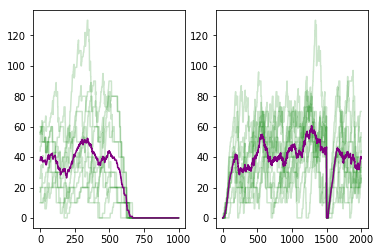

In [24]:
ssa1 = rss.ssa_solver(n_traj = 10,start_time=1000,tf=2000,tstep=2000,evaluating_inhibitor=True,time_inhibit=1500) 
ssa2 = rss.ssa_solver(n_traj = 10,start_time=0,tf=2000,tstep=2000,evaluating_frap=True,time_inhibit=1500)  #steady state

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot('121')
ax2 = fig.add_subplot('122')
ax.plot(ssa1.intensity_vec.T,color='green',alpha=.2)
ax.plot(np.mean(ssa1.intensity_vec.T,axis=1),color='purple')

ax2.plot(ssa2.intensity_vec.T,color='green',alpha=.2)
ax2.plot(np.mean(ssa2.intensity_vec.T,axis=1),color='purple')
fig.show()


These SSA objects that are returned are large and have their own data stored

In [25]:
ssa1.__dict__.keys()

dict_keys(['n_traj', 'k', 'no_rib_per_mrna', 'rib_density', 'ribosome_means', 'rib_vec', 'intensity_vec', 'time_vec_fixed', 'no_ribosomes', 'rib_means', 'time', 'time_rec', 'start_time', 'watched_ribs', 'col_points', 'evaluating_inhibitor', 'evaluating_frap', 'time_inhibit', 'solutions', 'solvetime', 'collisions', 'ribtimes', 'fragments', 'fragtimes', 'frag_per_traj', 'full_frags', 'all_results', 'autocorr_vec', 'mean_autocorr', 'error_autocorr', 'autocorr_vec_norm', 'mean_autocorr_norm', 'error_autocorr_norm', 'dwelltime', 'ke_sim', 'ke_true', 'probe', 'autocovariance_dict', 'autocovariance_norm_dict'])

In [49]:
ssa1 = rss.ssa_solver(n_traj = 10) 

print('conditions of the ssa and the ks ')
print('---------------------------------')
print('ran with %d trajectories ' %ssa1.n_traj)
print('from t0: %d to tf %d with %d timepoints'  %(ssa1.start_time,ssa1.time[-1],len(ssa1.time_rec)))
print('took %f seconds to solve'%ssa1.solvetime)

print('---------------------------------')
print('Some stats ')
print('The simulated elongation rate (calculated from the autocorrelation) was %fs' %ssa1.ke_sim)
print('The true elongation rate (recorded from the simulation) was %fs ' %ssa1.ke_true)
print('There were %d total collisions' %sum(ssa1.collisions))
print('The average dwell time of a ribosome was %fs ' %ssa1.dwelltime)


conditions of the ssa and the ks 
---------------------------------
ran with 10 trajectories 
from t0: 0 to tf 1000 with 1000 timepoints
took 0.294237 seconds to solve
---------------------------------
Some stats 
The simulated elongation rate (calculated from the autocorrelation) was 13.900000s
The true elongation rate (recorded from the simulation) was 11.126596s 
There were 1258 total collisions
The average dwell time of a ribosome was 124.124124s 


Text(0,0.5,'ACC/G0')

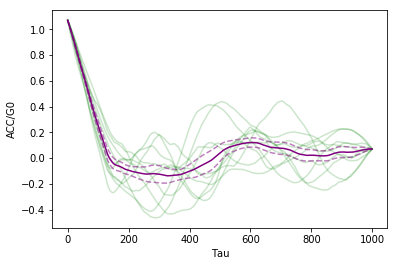

In [66]:
fig = plt.figure()
ax = fig.add_subplot('111')

ax.plot(ssa1.autocorr_vec_norm,color='green',alpha=.2)
ax.plot(ssa1.mean_autocorr_norm-ssa1.error_autocorr_norm ,'--',color='purple',alpha=.5)
ax.plot(ssa1.mean_autocorr_norm+ssa1.error_autocorr_norm ,'--',color='purple',alpha=.5)
ax.plot(ssa1.mean_autocorr_norm,color='purple')
ax.set_xlabel('Tau')
ax.set_ylabel('ACC/G0')


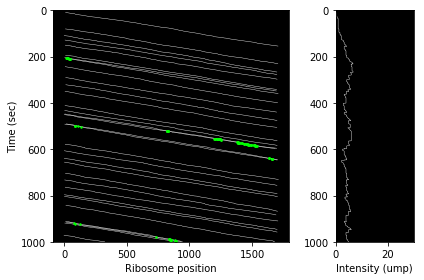

In [61]:
rss.kymograph(ssa1,0,bg_intense=False,color='white',lw=.4)